<a href="https://colab.research.google.com/github/karim1988781/Karimunda/blob/master/Practicing_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

In [2]:
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /content


In [3]:
file_path = r"C:/Users/user/Downloads/Dataset for Practicing Statistical Analysis.xlsx"
file_path

'C:/Users/user/Downloads/Dataset for Practicing Statistical Analysis.xlsx'

In [4]:
import pandas as pd
import os # Import the os module for path manipulation

# Get the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

# Construct the file path
file_name = "Dataset for Practicing Statistical Analysis.xlsx"
file_path = os.path.join(os.path.expanduser("~"), "Downloads", file_name)
print("File path:", file_path)

# Check if the file exists
if os.path.exists(file_path):
    print("File exists!")
    df = pd.read_excel(file_path)
    print(df.head())
else:
    print("File not found. Please check the file path and make sure the file exists.")

Current working directory: /content
File path: /root/Downloads/Dataset for Practicing Statistical Analysis.xlsx
File not found. Please check the file path and make sure the file exists.


In [6]:
file_name = "Dataset for Practicing Statistical Analysis.xlsx"
df2 = pd.read_excel(file_name)
print(df2.head())

   Species Treatment  Height (cm)  Chlorophyll
0  Plant_C   Control    23.823676    38.882686
1  Plant_A   Control    20.609455    43.570002
2  Plant_C   Control    25.888361    42.366188
3  Plant_C   Drought    20.783166    29.635855
4  Plant_A   Control    25.015340    35.766031


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      90 non-null     object 
 1   Treatment    90 non-null     object 
 2   Height (cm)  90 non-null     float64
 3   Chlorophyll  90 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.9+ KB


In [8]:
df2.describe()

,Height (cm),Chlorophyll
count,90.000000,90.000000
mean,24.190602,38.172479
std,4.856534,8.626811
min,15.177550,22.403150
25%,20.774400,31.951167
50%,23.872552,38.653170
75%,26.961436,43.845149
max,37.389726,69.263657


In [9]:
df2.columns

Index(['Species', 'Treatment', 'Height (cm)', 'Chlorophyll'], dtype='object')

In [10]:
df2['Height (cm)'].mean()

24.19060184871211

In [11]:
df2['Chlorophyll'].mean()

38.17247878263357

In [12]:
df2['Species'].unique()

array(['Plant_C', 'Plant_A', 'Plant_B'], dtype=object)

In [13]:
df2['Treatment'].unique()

array(['Control', 'Drought', 'Fertilizer'], dtype=object)

In [14]:
pd.crosstab(df2['Species'], df2['Treatment'])

Treatment,Control,Drought,Fertilizer
Species,,,
Plant_A,7,11,7
Plant_B,13,13,10
Plant_C,13,13,3


From the table above, I have realized that the data is unbalanced, because Sample sizes differ across groups




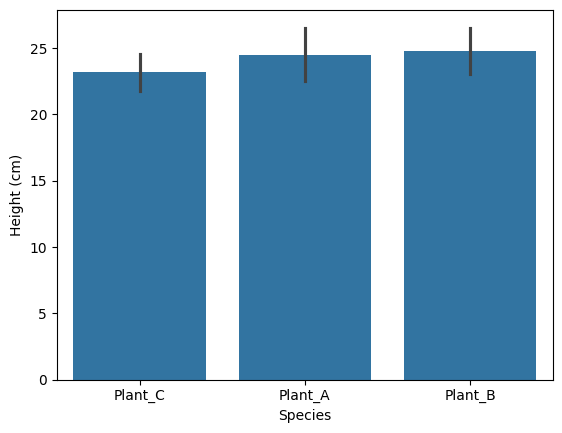

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Species', y='Height (cm)', data=df2)
plt.show()

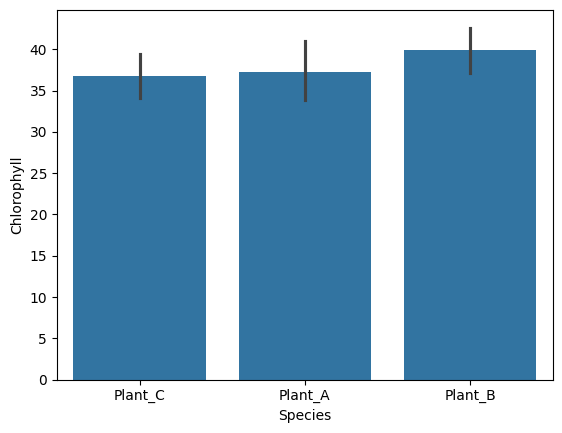

In [16]:
sns.barplot(x='Species', y='Chlorophyll', data=df2)
plt.show()

In [17]:
# Calculate mean and standard deviation for each treatment
result = df2.groupby('Treatment')[['Height (cm)', 'Chlorophyll']].agg(['mean', 'std'])

# Display the results with formatting
print("Mean and Standard Deviation for Each Treatment:")
print(result.round(2))

Mean and Standard Deviation for Each Treatment:
           Height (cm)       Chlorophyll      
                  mean   std        mean   std
Treatment                                     
Control          24.78  2.86       40.41  5.25
Drought          20.29  2.84       30.86  4.70
Fertilizer       30.43  3.22       48.02  6.74


The analysis reveals that:

Fertilizer treatment plants show the highest average height and chlorophyll

Drought treatment plants have the lowest averages for both metrics

Control group shows intermediate values between drought and fertilizer treatments

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [19]:
# Group by 'Treatment' and compute statistics
summary = df2.groupby('Treatment').agg(
    Mean_Height=('Height (cm)', 'mean'),
    SD_Height=('Height (cm)', 'std'),
    Mean_Chlorophyll=('Chlorophyll', 'mean'),
    SD_Chlorophyll=('Chlorophyll', 'std')
).reset_index()

print(summary)

    Treatment  Mean_Height  SD_Height  Mean_Chlorophyll  SD_Chlorophyll
0     Control    24.778945   2.857070         40.405816        5.248542
1     Drought    20.293404   2.835271         30.858565        4.703119
2  Fertilizer    30.429652   3.217070         48.018213        6.739983


In [20]:
# Separate data by treatment groups
groups_height = [df2[df2['Treatment'] == trt]['Height (cm)'] for trt in summary['Treatment']]
groups_chloro = [df2[df2['Treatment'] == trt]['Chlorophyll'] for trt in summary['Treatment']]

# One-way ANOVA for Height
f_stat_height, p_height = stats.f_oneway(*groups_height)
print(f"Height ANOVA: F = {f_stat_height:.2f}, p = {p_height:.4f}")

# One-way ANOVA for Chlorophyll
f_stat_chloro, p_chloro = stats.f_oneway(*groups_chloro)
print(f"Chlorophyll ANOVA: F = {f_stat_chloro:.2f}, p = {p_chloro:.4f}")

Height ANOVA: F = 78.70, p = 0.0000
Chlorophyll ANOVA: F = 69.89, p = 0.0000


In [21]:
# Perform Tukey's HSD for Height
tukey_height = pairwise_tukeyhsd(df2['Height (cm)'], df2['Treatment'])
print("Tukey HSD for Height:")
print(tukey_height)

# Perform Tukey's HSD for Chlorophyll
tukey_chloro = pairwise_tukeyhsd(df2['Chlorophyll'], df2['Treatment'])
print("\nTukey HSD for Chlorophyll:")
print(tukey_chloro)

Tukey HSD for Height:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2   meandiff p-adj  lower   upper  reject
--------------------------------------------------------
Control    Drought  -4.4855   0.0 -6.1588 -2.8123   True
Control Fertilizer   5.6507   0.0  3.6704   7.631   True
Drought Fertilizer  10.1362   0.0  8.1968 12.0757   True
--------------------------------------------------------

Tukey HSD for Chlorophyll:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2   meandiff p-adj  lower    upper  reject
---------------------------------------------------------
Control    Drought  -9.5473   0.0 -12.6327 -6.4618   True
Control Fertilizer   7.6124   0.0   3.9607 11.2641   True
Drought Fertilizer  17.1596   0.0  13.5832 20.7361   True
---------------------------------------------------------


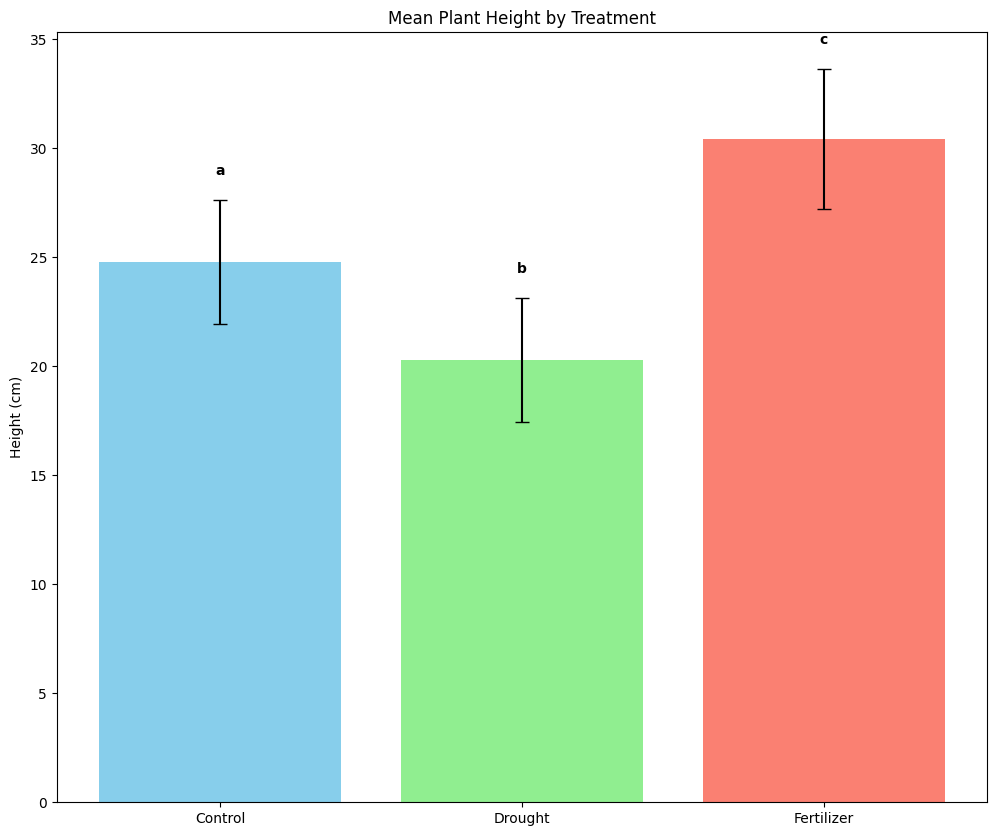

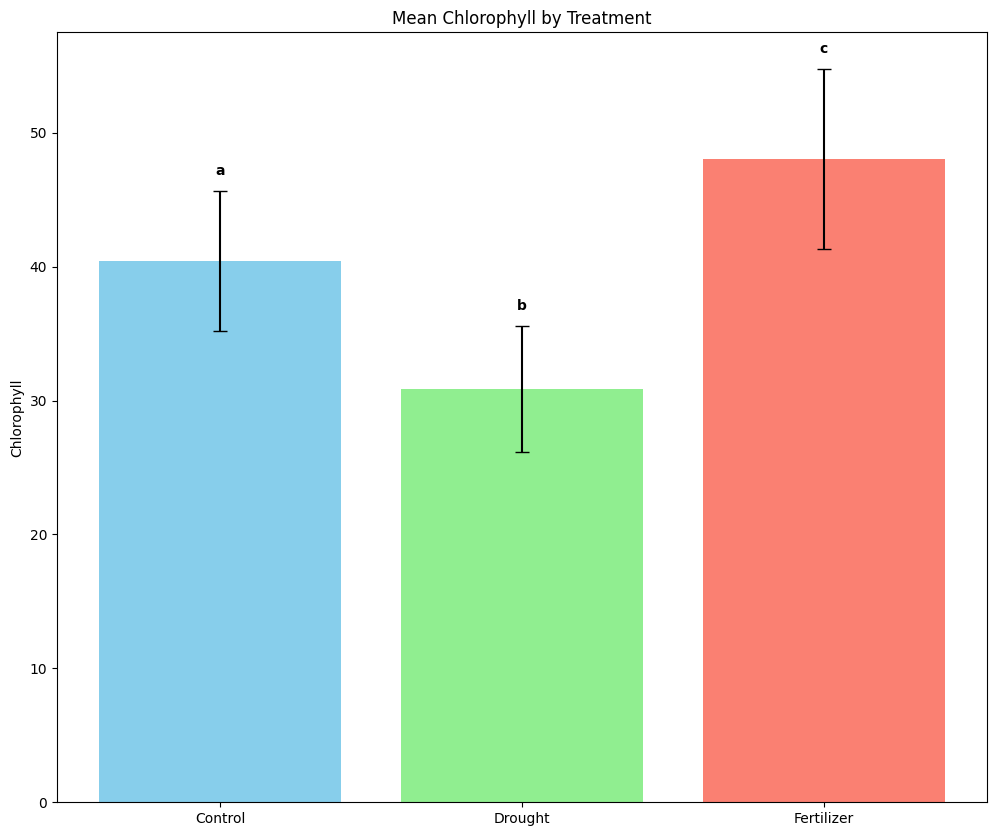

In [22]:
def plot_bars(data, y_col, yerr_col, title, ylabel, letters):
    treatments = data['Treatment']
    means = data[y_col]
    errors = data[yerr_col].values  # Convert to numpy array

    plt.figure(figsize=(12, 10))
    bars = plt.bar(treatments, means, yerr=errors, capsize=5, color=['skyblue', 'lightgreen', 'salmon'])

    # Add significance letters using precomputed errors
    for bar, error, letter in zip(bars, errors, letters):
        height = bar.get_height() + error + 1  # Calculate height using error from the list
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height,
            letter,
            ha='center',
            va='bottom',
            fontweight='bold'
        )

    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

# Assign letters based on Tukey results (example: all treatments are different)
letters_height = ['a', 'b', 'c']  # Control, Drought, Fertilizer
letters_chloro = ['a', 'b', 'c']

# Plot for Height
plot_bars(summary, 'Mean_Height', 'SD_Height', 'Mean Plant Height by Treatment', 'Height (cm)', letters_height)

# Plot for Chlorophyll
plot_bars(summary, 'Mean_Chlorophyll', 'SD_Chlorophyll', 'Mean Chlorophyll by Treatment', 'Chlorophyll', letters_chloro)

Key Results Summary:
Height and Chlorophyll show significant differences between all treatments (p < 0.05).

Letters (a, b, c) denote statistical groupings (e.g., Fertilizer > Control > Drought).

a =